In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [28]:
df = pd.read_csv('movie_ratings.csv')

/var/folders/p9/2wll16j90lbbv732d64v20z00000gn/T/ipykernel_13699/2184267651.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movie_ratings.csv')


In [29]:
df.drop(['Unnamed: 0','timestamp'], axis =1, inplace =True)
df.head()

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995


In [30]:
df.isna().sum()

userId      0
movieId     0
rating      0
title       6
genres      6
year       23
dtype: int64

In [31]:
df.loc[df['genres'].isna()] ### Dropping NaN's as they'll effect EDA

,userId,movieId,rating,title,genres,year
4747,28,64997,3.5,NaN,NaN,NaN
11451,68,64997,2.5,NaN,NaN,NaN
17819,111,144606,4.0,NaN,NaN,NaN
49832,318,147002,4.0,NaN,NaN,NaN
80596,509,26958,3.5,NaN,NaN,NaN
81458,514,168358,2.5,NaN,NaN,NaN


In [32]:
n_ratings  = len(df['rating'])
n_users = len(df['userId'].unique())
n_items = len(df['movieId'].unique())
print('Amount of Ratings:',n_ratings)
print('Amount of Users:', n_users)
print('Amount of Movies:', n_items)

Amount of Ratings: 100836
Amount of Users: 610
Amount of Movies: 9724


In [33]:
sparsity = 1-(n_ratings/(n_users*n_items))
sparsity 

0.9830003169443864

#### Splitting Genres

In [34]:
df.dropna(inplace=True)

In [35]:
df.isna().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
year       0
dtype: int64

In [36]:
df['genres']

0         Adventure|Animation|Children|Comedy|Fantasy
1                                      Comedy|Romance
2                               Action|Crime|Thriller
3                                    Mystery|Thriller
4                              Crime|Mystery|Thriller
                             ...                     
100831                          Drama|Horror|Thriller
100832                          Action|Crime|Thriller
100833                                         Horror
100834                                  Action|Sci-Fi
100835                    Action|Crime|Drama|Thriller
Name: genres, Length: 100813, dtype: object

In [37]:
df.loc[df['genres'] == '(no genres listed)']

,userId,movieId,rating,title,genres,year
3624,21,122896,4.0,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2017
7353,50,114335,3.0,La cravate (1957),(no genres listed),1957
7408,50,174403,2.5,The Putin Interviews (2017),(no genres listed),2017
9101,62,122896,3.5,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2017
9141,62,172591,5.0,The Godfather Trilogy: 1972-1990 (1992),(no genres listed),1992
14028,89,155589,3.0,Noin 7 veljestä (1968),(no genres listed),1968
16913,105,171749,5.0,Death Note: Desu nôto (2006–2007),(no genres listed),2006–2007
16925,105,173535,4.5,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),1980
17780,111,122896,3.5,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2017
17804,111,134861,2.5,Trevor Noah: African American (2013),(no genres listed),2013


In [38]:
df = df[df['genres'] != '(no genres listed)']

In [39]:
df.loc[df['genres'] == '(no genres listed)']

,userId,movieId,rating,title,genres,year


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100775 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100775 non-null  int64  
 1   movieId  100775 non-null  int64  
 2   rating   100775 non-null  float64
 3   title    100775 non-null  object 
 4   genres   100775 non-null  object 
 5   year     100775 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 5.4+ MB


In [41]:
df['year']=df['year'].astype(int)

In [42]:
df.head()

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995


#### Check for most viewed movie genres

In [43]:
df['genres'] = df['genres'].str.replace('|',' ')
counts = dict()
for i in df.index:
   for g in df.loc[i,'genres'].split(' '):
      if g not in counts:
         counts[g] = 1
      else:
         counts[g] = counts[g] + 1

/var/folders/p9/2wll16j90lbbv732d64v20z00000gn/T/ipykernel_13699/1599671751.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['genres'] = df['genres'].str.replace('|',' ')


In [44]:
counts

{'Adventure': 24161,
 'Animation': 6988,
 'Children': 9208,
 'Comedy': 39052,
 'Fantasy': 11834,
 'Romance': 18121,
 'Action': 30629,
 'Crime': 16680,
 'Thriller': 26445,
 'Mystery': 7674,
 'Horror': 7291,
 'Drama': 41924,
 'War': 4859,
 'Western': 1930,
 'Sci-Fi': 17234,
 'Musical': 4138,
 'Film-Noir': 870,
 'IMAX': 4145,
 'Documentary': 1219}

In [45]:
counts_df = pd.DataFrame(list(counts.items()), columns = ['Genres','Count'])
counts_df =counts_df.sort_values(by='Count',ascending=False)
counts_df

,Genres,Count
11,Drama,41924
3,Comedy,39052
6,Action,30629
8,Thriller,26445
0,Adventure,24161
5,Romance,18121
14,Sci-Fi,17234
7,Crime,16680
4,Fantasy,11834
2,Children,9208


In [46]:
counts_df['Count'].mean()

14442.21052631579

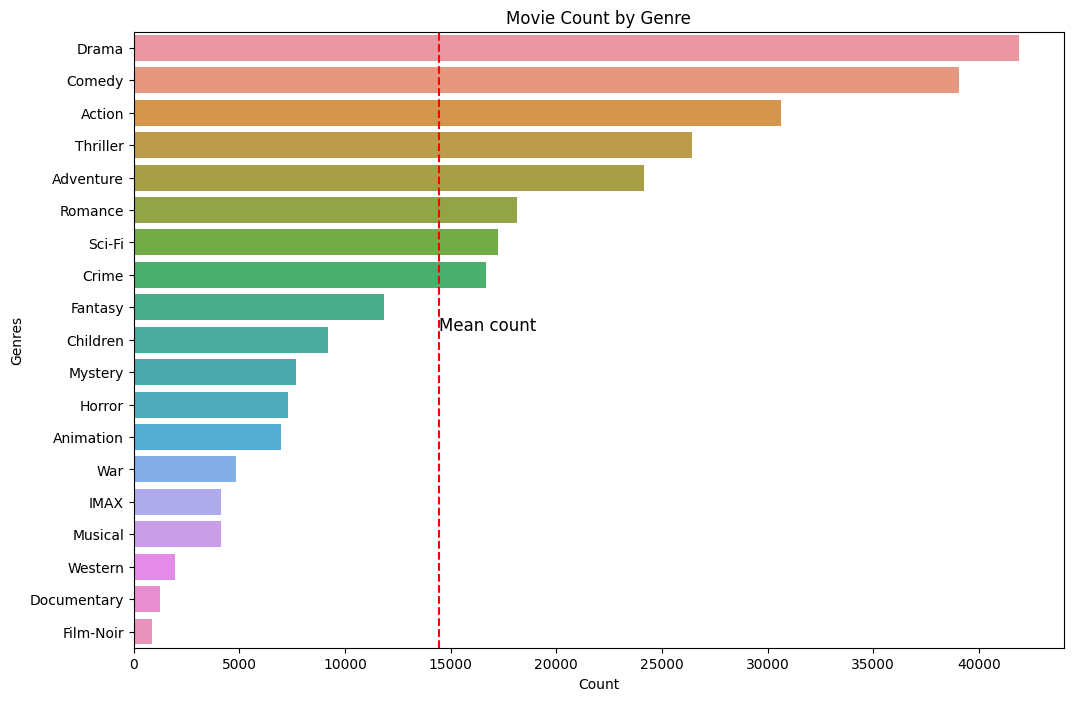

In [61]:
mean_count = counts_df['Count'].mean()
plt.figure(figsize=(12,8))
ax=sns.barplot(x='Count', y='Genres', data=counts_df)
ax.axvline(x=mean_count, color='r', linestyle='--')
plt.title('Movie Count by Genre')
plt.annotate('Mean count', (mean_count,0), xytext=(35, -200), textcoords='offset points', ha='center', va='center', fontsize=12, color='black')
plt.savefig('Genre_Distribution.png')

Adventure, Thriller, Action, Comedy, and Drama are the genres with most occurences in the dataset

#### Distribtuion of Ratings

In [48]:
ratings_series= df.rating.value_counts()
frequency= ratings_series.values
ratings_series

4.0    26807
3.0    20038
5.0    13203
3.5    13127
4.5     8542
2.0     7549
2.5     5542
1.0     2809
1.5     1791
0.5     1367
Name: rating, dtype: int64

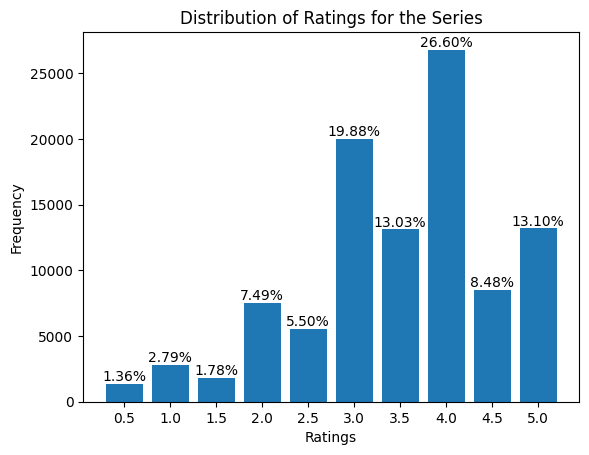

In [63]:
ratings = ['4.0', '3.0', '5.0', '3.5', '4.5', '2.0', '2.5', '1.0', '1.5', '0.5']
frequency = [26807, 20038, 13203, 13127, 8542, 7549, 5542, 2809, 1791, 1367]
ratings, frequency = zip(*sorted(zip(ratings, frequency)))
# create bar chart
plt.bar(ratings, frequency)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings for the Series')

total_count = sum(frequency)
for i in range(len(frequency)):
    percentage = (frequency[i] / total_count) * 100
    plt.text(x = ratings[i], y = frequency[i], s = f'{percentage:.2f}%', ha = 'center', va = 'bottom')
    plt.savefig('Rating_dist.png')

only 19% of ratings fall below the 3.0 mark all the while a rating of 4.0 takes a quarter of the ratings, no statistical explanation more 0of a social science. May find more through modeling portion

In [ ]:
# df.to_csv('cleaned_movie_ratings.csv')

#### Ratings Per Movie

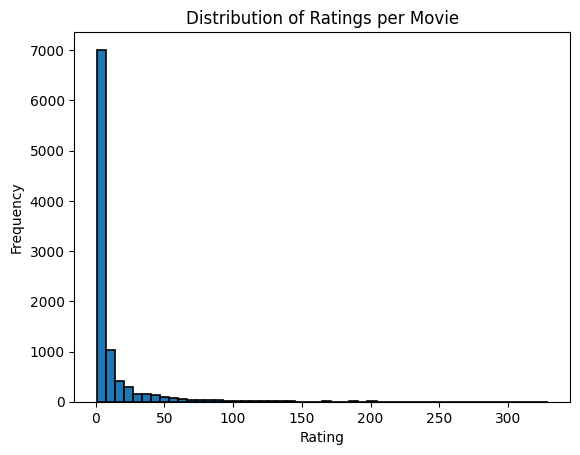

In [59]:
movie_ratings_count = df.groupby("movieId")["rating"].count()
plt.hist(movie_ratings_count,bins=50, edgecolor='black', linewidth=1.2)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings per Movie")
plt.show()